В рамках данного проекта перед нами стоит задача узнать, является ли расположение ТРЦ часто встречающимся фактором в отзывах. 
В качестве отзывов будут браться отзывы с Яндекс Карт у 10 ТРЦ в городе Москва.

### Посмотрим на расположение ТРЦ на карте

In [1]:
import folium

#список координат (широта, долгота)
coordinates = [
    [55.710742, 37.675450],
    [55.692065, 37.527865],
    [55.663782, 37.511308],
    [55.663067, 37.480860],
    [55.678022, 37.467330],
    [55.655876, 37.541598],
    [55.707081, 37.591437],
    [55.618608, 37.506486],
    [55.730937, 37.639973],
    [55.664253, 37.627747]
]

#создаем карту, центрируем ее на Москве
map_moscow = folium.Map(location=[55.7558, 37.6173], zoom_start=10)

#добавляем маркеры для каждой координаты
for coord in coordinates:
    folium.Marker(location=coord).add_to(map_moscow)

#отображаем карту
map_moscow

### Парсинг отзывов 

In [2]:
from yandex_reviews_parser.utils import YandexParser
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
import time
from time import sleep

#список торговых центров
org_dict = {'Капитолий Университет': 1068005570, 
            'РИО Ленинский': 99774578525,
            'Авеню Юго-Западная': 1574116136,
           'Фестиваль Мичуринский Проспект': 1129181602,
           'Калужский Калужская': 1039696501,
           'Гагаринский Площадь Гагарина': 1013729832,
           'Принц Плаза Теплый Cтан': 1003792929,
           'Павелецкая Плаза': 72900666552,
           'Гудзон Коломенский Проезд': 1214451177,
           'Мозаика Дубровка': 1664687615}

list_id = list(org_dict.values())

total_reviews = []

#записываем время начала выполнения
start_time = time.time()

#парсим отзывы
for i in range(len(list_id)):
    parser = YandexParser(list_id[i])
    sleep(5)
    all_data = parser.parse() 

    total_reviews.append(all_data["company_info"]["count_rating"])

#извлечение текста отзывов
    reviews_text = [review['text'].replace('\n', ' ') for review in all_data['company_reviews']]

#записываем время окончания выполнения
end_time = time.time()

#вычисляем разницу времени
elapsed_time = end_time - start_time

print('Всего было спарсено', sum(total_reviews), 'отзывов')
print(f"Время выполнения кода: {elapsed_time} секунд.")    


Всего было спарсено 374506 отзывов
Время выполнения кода: 801.6269507408142 секунд.


### Построим облако слов

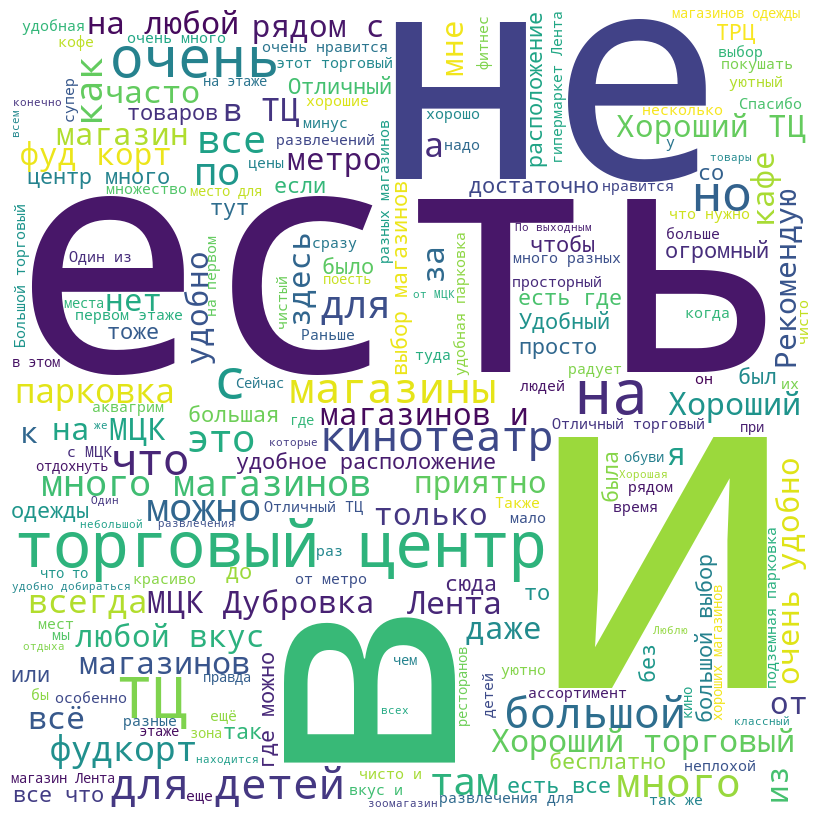

In [3]:
#объединение всех отзывов в один большой текст
text = " ".join(review for review in reviews_text)

#создание облака слов
wordcloud = WordCloud(width=800, height=800, 
                      background_color ='white', 
                      stopwords = set(["russian_stopword1", "russian_stopword2"]),  # Можно добавить стоп-слова
                      min_font_size = 10).generate(text)

#визуализация облака слов
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0) 
  
plt.show()

Видно, что в облаке слов фигурирует группа слов, которая относиться к расположению ТРЦ: МЦК, МЦК дубровка, от метро, расположение, удобное расположение.
Однако, таких слов не много и встречаются они не так часто, но достаточно, чтобы попасть в облако слов.

### Почистим текст, удалим все предлоги, союзы и т.п. и проведем лемматизацию слов

In [4]:
import nltk
from nltk.corpus import stopwords
from pymystem3 import Mystem

#установка nltk для стоп-слов
nltk.download('stopwords')

#получение списка стоп-слов для русского языка
russian_stopwords = stopwords.words('russian')

#создание объекта Mystem
mystem = Mystem()

def preprocess_text_lemmatize(text):
    text = str(text)
    lemmas = mystem.lemmatize(text.lower())
    lemmas = [lemma for lemma in lemmas if lemma.strip() and lemma not in russian_stopwords]
    return " ".join(lemmas)


#применение функции предобработки
text = preprocess_text_lemmatize(text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikita.kurov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Посмотрим на облако слов после обработки текста

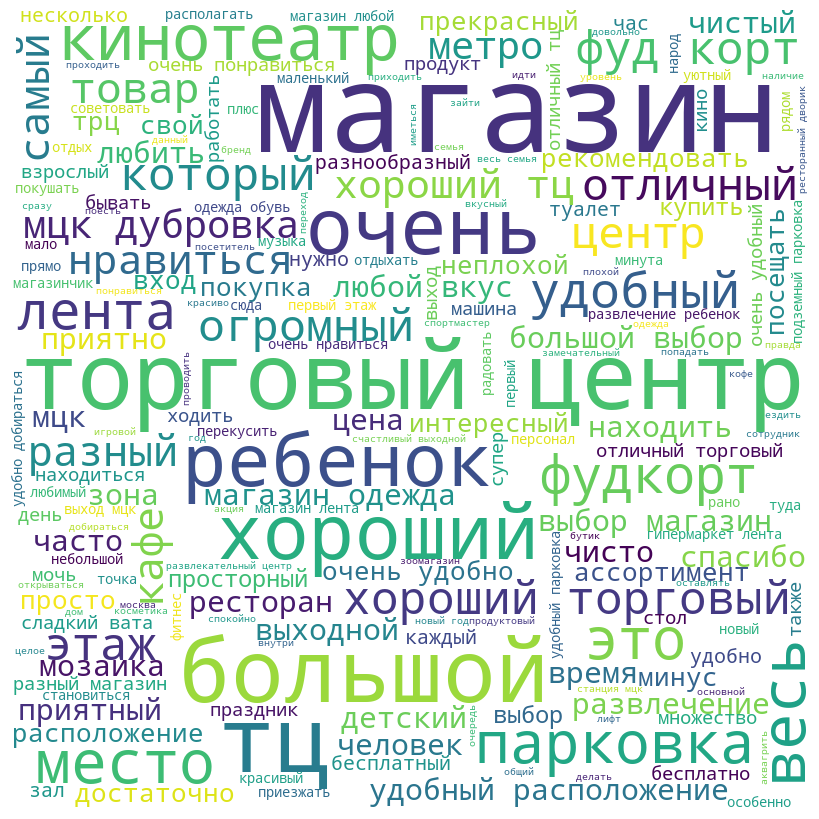

In [5]:
#создание облака слов
wordcloud = WordCloud(width=800, height=800, 
                      background_color ='white', 
                      stopwords = set(["russian_stopword1", "russian_stopword2"]),  # Можно добавить стоп-слова
                      min_font_size = 10).generate(text)

#визуализация облака слов
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0) 
  
plt.show()

Видно, что после обработки текста, слова относящиеся к характеристике расположения стали чаще появляться: рядом, МЦК дуброка, удобно добираться, добираться, выход МЦК, удобное расположение, расположение, станция МЦК

### Посмотрим какие слова чаще всего повторяются 

In [6]:
from collections import Counter

#удаление знаков препинания и приведение текста к нижнему регистру
text = re.sub(r'[^\w\s]', '', text.lower())

#разделение текста на слова
words = text.split()

#подсчет частоты каждого слова в тексте
word_counts = Counter(words)

#получение 30 наиболее частых слов
top_30_words = word_counts.most_common(30)

#вывод топ-30 слов и их количество
for word, count in top_30_words:
    print(f"{word}: {count}")

магазин: 465
тц: 308
центр: 303
очень: 269
торговый: 261
большой: 241
хороший: 238
ребенок: 179
удобный: 146
парковка: 142
мцк: 130
лента: 122
весь: 119
кинотеатр: 118
место: 106
выбор: 103
отличный: 102
удобно: 82
это: 81
фудкорт: 77
одежда: 76
этаж: 74
метро: 67
огромный: 66
разный: 64
расположение: 64
выходной: 62
рядом: 58
нравиться: 58
фуд: 58


Видно, что на 11 месте по частоте является слово МЦК, что говорит о том, что посетители часто упоминают наличие МЦК возле ТРЦ, 23 и 26 места заняли слова метро и расположение и на 28 месте слово рядом. То есть локация торгового центра влияет на отзывы, так как пользователи часто упоминают какие-то характеристики, связанные с месторасположением 

### Посмотрим на биграммы и триграммы (часто встречающиеся словосочетания) 

In [7]:
from nltk.util import ngrams
import pandas as pd 

#функция для генерации биграмм и триграмм
def generate_ngrams(text, n):
    words = nltk.word_tokenize(text)
    n_grams = list(ngrams(words, n))
    return n_grams

#создание биграмм и триграмм
bigrams = generate_ngrams(text, 2)
trigrams = generate_ngrams(text, 3)

#подсчет частоты биграмм и триграмм
bigram_counter = Counter(bigrams)
trigram_counter = Counter(trigrams)

#создание датафрейма для биграмм
df_bigrams = pd.DataFrame(bigram_counter.most_common(20), columns=['Bigram', 'Frequency'])

#создание датафрейма для триграмм
df_trigrams = pd.DataFrame(trigram_counter.most_common(20), columns=['Trigram', 'Frequency'])

#вывод результатов
print("Датафрейм для биграмм:")
print(df_bigrams)

print("\nДатафрейм для триграмм:")
print(df_trigrams)

Датафрейм для биграмм:
                     Bigram  Frequency
0         (торговый, центр)        241
1               (фуд, корт)         51
2       (хороший, торговый)         50
3             (хороший, тц)         38
4           (мцк, дубровка)         37
5   (удобный, расположение)         37
6             (любой, вкус)         35
7          (большой, выбор)         33
8          (выбор, магазин)         33
9         (магазин, одежда)         32
10          (очень, удобно)         31
11        (разный, магазин)         24
12     (отличный, торговый)         24
13       (хороший, магазин)         24
14          (сладкий, вата)         23
15         (очень, удобный)         21
16     (очень, понравиться)         21
17           (отличный, тц)         21
18   (развлечение, ребенок)         20
19       (очень, нравиться)         20

Датафрейм для триграмм:
                         Trigram  Frequency
0     (хороший, торговый, центр)         48
1    (отличный, торговый, центр)         23
2

Видно, что на 5 месте расположилась биграмма мцк дубровка, на 6 удобное расположение. С триграмма ситуация иная, но это легко объясняется тем, что 1 и туже характеристику можно описать разными словами, например хороший, отличный, большой(топ 3 триграмм, которые по сути являются подмножеством множества торговый центр) Тем не менее, и тут мы видим триграмму, относящуюся к локации, это станция мцк дубровка.

### Таким образом, на базе 40к отзывов с 10 ТРЦ в Москве мы увидели, что люди довольно часто упоминают локацию в отзывах, что говорит о важности этого фактора на формирование мнения посетителей. 